# AI for CS project

| Name | Mail | ID |
| --- | --- | --- |
| Ahmed Mahmoud Mohamed Farag | afara109@uottawa.ca | 300266868 |
| --- | --- | --- |
| Omar Ahmed Abdelbasset Haridy | ohari043@uottawa.ca | 300267038 |
| --- | --- | --- |
| Mayar Amr Mohamed Attawiya | matta057@uottawa.ca | 300267050 |
| --- | --- | --- |
| Salma Khaled Mohamed Elgendy | selge047@uottawa.ca | 300267042 |


## Data loading and investigation

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from sklearn import datasets #Import scikit-learn dataset library
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, classification_report
import os
from sklearn import svm
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
# from tensorflow.keras import backend as K

In [3]:
tf.random.set_seed(42)

In [4]:
X = pd.read_csv('/content/gdrive/MyDrive/AI_for_CS/X_preprocessed.csv')

In [5]:
y = pd.read_csv('/content/gdrive/MyDrive/AI_for_CS/y_preprocessed.csv')

In [6]:
y = y["Label"]

In [7]:
X = X.drop(columns = ['Unnamed: 0'])

In [8]:
X.shape

(983484, 66)

In [9]:
df = X.join(y)

In [10]:
df = df.sort_values(by=['Label']) #sort for images

In [11]:
df['Label'].value_counts()

6     99626
4     99524
7     98720
2     97914
8     97804
3     96547
1     96203
5     95060
10    86619
9     85829
0     29638
Name: Label, dtype: int64

In [12]:
X = df.drop(columns = ['Label'])

In [13]:
def norm_features(X):
    hmm2 = np.empty([len(X), 66])
    count = 0
    for col in X:
        hmm = []
        min = X[col].min()
        max = X[col].max()
        for i in X[col]:
            xnew = ((i - min) / (max - min)) * 255
            hmm.append(xnew)
        hmm2[:,count] = np.array(hmm)
        #break
        count += 1
    return hmm2

In [14]:
# 66 x 66 x 3 each 198 sample will be an image
def conv_img(X):
    img = np.empty([4967,66,66,3])
    i = 0
    for j in range(4967):
        for c in range(3):
            for k in range(66):
                img[j,:,k,c] = X[i,:]
                i += 1
    return img

In [15]:
norm = norm_features(X)

In [16]:
img = conv_img(norm)
img.shape

(4967, 66, 66, 3)

In [17]:
indices = list(range(len(img)))

In [18]:
len(indices)

4967

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


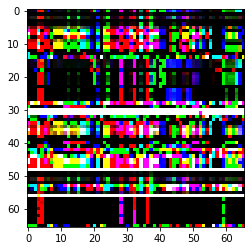

In [19]:
imageA = img[10]
plt.imshow(imageA) #benign

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


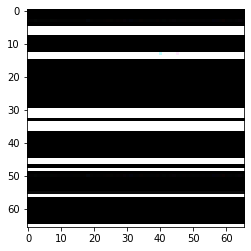

In [20]:
dns = img[1239]
plt.imshow(dns)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


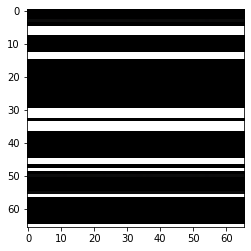

In [21]:
ldab = img[2996]
plt.imshow(ldab)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


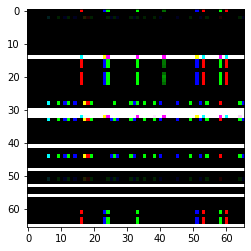

In [22]:
syn = img[4900]
plt.imshow(syn)

In [23]:
y = 150 * [0] + 486 * [1] + 494 * [2] + 488 * [3] + 503 * [4] + 480 * [5] + 503 * [6] + 499 * [7] + 494 * [8] + 433 * [9] + 437 * [10] 
print(len(y))

4967


In [24]:
import cv2
images = []
for image in img:
  images.append(cv2.resize(image, (224,224), interpolation = cv2.INTER_AREA)) #to be applicable with efficientnet
images = np.array(images)

In [25]:
images.shape

(4967, 224, 224, 3)

In [26]:
nClasses = 11
# Use Keras' handy utils
split = train_test_split(images, y, indices, test_size=0.2, random_state=42)
(trainX, validateX, trainY, validateY, indices_train, indices_test) = split
y_train_k = tensorflow.keras.utils.to_categorical(trainY, num_classes=nClasses)
y_val_k = tensorflow.keras.utils.to_categorical(validateY, num_classes=nClasses)

In [27]:
import itertools
import os

import matplotlib.pylab as plt
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub

print('TF version:', tf.__version__)
print('Hub version:', hub.__version__)
print('Phsical devices:', tf.config.list_physical_devices())

def get_hub_url_and_isize(model_name, ckpt_type, hub_type):
  if ckpt_type == '1k':
    ckpt_type = ''  # json doesn't support empty string
  else:
    ckpt_type = '-' + ckpt_type  # add '-' as prefix
  
  hub_url_map = {
    'efficientnetv2-b0': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b0/{hub_type}',
    'efficientnetv2-b1': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b1/{hub_type}',
    'efficientnetv2-b2': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b2/{hub_type}',
    'efficientnetv2-b3': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b3/{hub_type}',
    'efficientnetv2-s':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-s/{hub_type}',
    'efficientnetv2-m':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-m/{hub_type}',
    'efficientnetv2-l':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-l/{hub_type}',

    'efficientnetv2-b0-21k': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b0-21k/{hub_type}',
    'efficientnetv2-b1-21k': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b1-21k/{hub_type}',
    'efficientnetv2-b2-21k': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b2-21k/{hub_type}',
    'efficientnetv2-b3-21k': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b3-21k/{hub_type}',
    'efficientnetv2-s-21k':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-s-21k/{hub_type}',
    'efficientnetv2-m-21k':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-m-21k/{hub_type}',
    'efficientnetv2-l-21k':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-l-21k/{hub_type}',
    'efficientnetv2-xl-21k':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-xl-21k/{hub_type}',

    'efficientnetv2-b0-21k-ft1k': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b0-21k-ft1k/{hub_type}',
    'efficientnetv2-b1-21k-ft1k': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b1-21k-ft1k/{hub_type}',
    'efficientnetv2-b2-21k-ft1k': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b2-21k-ft1k/{hub_type}',
    'efficientnetv2-b3-21k-ft1k': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b3-21k-ft1k/{hub_type}',
    'efficientnetv2-s-21k-ft1k':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-s-21k-ft1k/{hub_type}',
    'efficientnetv2-m-21k-ft1k':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-m-21k-ft1k/{hub_type}',
    'efficientnetv2-l-21k-ft1k':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-l-21k-ft1k/{hub_type}',
    'efficientnetv2-xl-21k-ft1k':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-xl-21k-ft1k/{hub_type}',
      
    # efficientnetv1
    'efficientnet_b0': f'https://tfhub.dev/tensorflow/efficientnet/b0/{hub_type}/1',
    'efficientnet_b1': f'https://tfhub.dev/tensorflow/efficientnet/b1/{hub_type}/1',
    'efficientnet_b2': f'https://tfhub.dev/tensorflow/efficientnet/b2/{hub_type}/1',
    'efficientnet_b3': f'https://tfhub.dev/tensorflow/efficientnet/b3/{hub_type}/1',
    'efficientnet_b4': f'https://tfhub.dev/tensorflow/efficientnet/b4/{hub_type}/1',
    'efficientnet_b5': f'https://tfhub.dev/tensorflow/efficientnet/b5/{hub_type}/1',
    'efficientnet_b6': f'https://tfhub.dev/tensorflow/efficientnet/b6/{hub_type}/1',
    'efficientnet_b7': f'https://tfhub.dev/tensorflow/efficientnet/b7/{hub_type}/1',
  }
  
  image_size_map = {
    'efficientnetv2-b0': 224,
    'efficientnetv2-b1': 240,
    'efficientnetv2-b2': 260,
    'efficientnetv2-b3': 300,
    'efficientnetv2-s':  384,
    'efficientnetv2-m':  480,
    'efficientnetv2-l':  480,
    'efficientnetv2-xl':  512,
  
    'efficientnet_b0': 224,
    'efficientnet_b1': 240,
    'efficientnet_b2': 260,
    'efficientnet_b3': 300,
    'efficientnet_b4': 380,
    'efficientnet_b5': 456,
    'efficientnet_b6': 528,
    'efficientnet_b7': 600,
  }
  
  hub_url = hub_url_map.get(model_name + ckpt_type)
  image_size = image_size_map.get(model_name, 224)
  return hub_url, image_size


def get_imagenet_labels(filename):
  labels = []
  with open(filename, 'r') as f:
    for line in f:
      labels.append(line.split('\t')[1][:-1])  # split and remove line break.
  return labels


TF version: 2.7.0
Hub version: 0.12.0
Phsical devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [28]:
# Build model
import tensorflow_hub as hub
model_name = 'efficientnetv2-b0' #@param {type:'string'}
ckpt_type = '1k'   # @param ['21k', '21k-ft1k', '1k']
hub_type = 'feature-vector' # @param ['feature-vector']
batch_size =  128#@param {type:"integer"}
hub_url, image_size = get_hub_url_and_isize(model_name, ckpt_type, hub_type)

In [29]:
print(image_size)

224


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


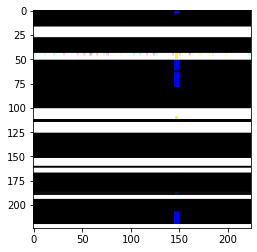

In [30]:
plt.imshow(images[2599])

In [31]:
# whether to finetune the whole model or just the top layer.
do_fine_tuning = True #@param {type:"boolean"}
num_epochs =  23#@param {type:"integer"}

tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    # Explicitly define the input shape so the model can be properly
    # loaded by the TFLiteConverter
    tf.keras.layers.InputLayer(input_shape=[image_size, image_size, 3]),
    hub.KerasLayer(hub_url, trainable=do_fine_tuning),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(11,
                          kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])
model.build((None, image_size, image_size, 3))
model.summary()

model.compile(
  optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), 
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.1),
  metrics=['accuracy'])

history = model.fit(
    trainX, y_train_k, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_data=(validateX, y_val_k))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              5919312   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 11)                14091     
                                                                 
Total params: 5,933,403
Trainable params: 5,872,795
Non-trainable params: 60,608
_________________________________________________________________
Epoch 1/23
32/32 [==============================] - 32s 437ms/step - loss: 2.2123 - accuracy: 0.2945 - val_loss: 1.8493 - val_accuracy: 0.7193
Epoch 2/23
32/32 [==============================] - 11s 359ms/step - loss: 1.6091 - accuracy: 0.7395 - val_loss: 1.2097 - val_accuracy: 0.8823
Epoch 3/23
32/32 [=

In [32]:
y_prob = model.predict(validateX)

In [33]:
y_pred = y_prob.argmax(axis=-1)

In [34]:
print("Report : \n",classification_report(validateY, y_pred))

Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.99      1.00      1.00       106
           2       1.00      1.00      1.00       105
           3       1.00      1.00      1.00        98
           4       1.00      1.00      1.00        99
           5       1.00      1.00      1.00        96
           6       1.00      0.99      0.99        95
           7       0.65      0.72      0.68        79
           8       0.76      0.70      0.73       102
           9       0.93      0.99      0.96        88
          10       0.99      0.92      0.95        91

    accuracy                           0.94       994
   macro avg       0.94      0.94      0.94       994
weighted avg       0.94      0.94      0.94       994



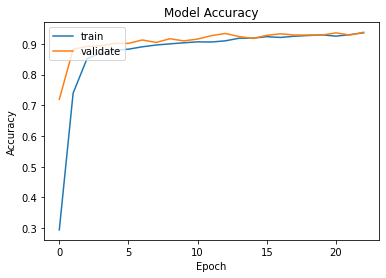

In [35]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in history.history :
    k = 'accuracy'    

if 'acc' in history.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validate'], loc='upper left')
    plt.show()

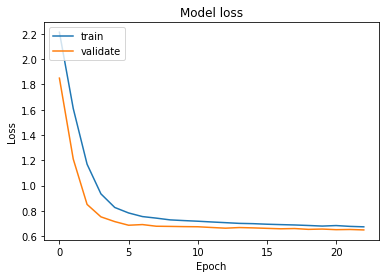

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

In [37]:
y_probtrain = model.predict(trainX)

In [38]:
EfficientNet_prob = np.append(y_probtrain, y_prob, axis=0)

In [39]:
EfficientNet_prob.shape

(4967, 11)

In [40]:
full_index =  indices_train + indices_test

In [41]:
len(full_index)

4967

In [42]:
sorted_Prob = [x for _,x in sorted(zip(full_index, EfficientNet_prob))]

In [43]:
sorted_Prob = np.array(sorted_Prob)

In [44]:
sorted_Prob.shape

(4967, 11)

In [45]:
from numpy import savetxt
savetxt('Probabilities_EfficientNet_final.csv', sorted_Prob, delimiter=',')

In [46]:
!cp Probabilities_EfficientNet_final.csv "/content/gdrive/MyDrive/AI_for_CS"